In [1]:
import imutils                              # redimencionamento, rotacao
import numpy as np
import cv2                                  # import OpenCV
from google.colab.patches import cv2_imshow
from google.colab import files              # uploaded = files.upload()
from base64 import b64decode                # biblioteca para codificar dados binarios
from IPython.display import Image, display, Javascript
from google.colab.output import eval_js     # webcan leitura

In [5]:
# Start webcan
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
  async function takePhoto(quality) {
    const div = document.createElement('div');
    const capture = document.createElement('button');
    capture.textContent = 'Capture';
    div.appendChild(capture);

    const video = document.createElement('video');
    video.style.display = 'block';
    const stream = await navigator.mediaDevices.getUserMedia({video: true});

    document.body.appendChild(div);
    div.appendChild(video);

    video.srcObject = stream;
    await video.play();

    // Resize the output to fit the video element.
    google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

    // Wait for Capture to be clicked.
    await new Promise((resolve) => capture.onclick = resolve);

    const canvas = document.createElement('canvas');
    canvas.width = video.videoWidth;
    canvas.height = video.videoHeight;
    canvas.getContext('2d').drawImage(video, 0, 0);
    stream.getVideoTracks()[0].stop();
    div.remove();
    return canvas.toDataURL('image/jpeg', quality);
  }
  ''')
  display(Javascript(js))
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

width=400, height=300, depth=3


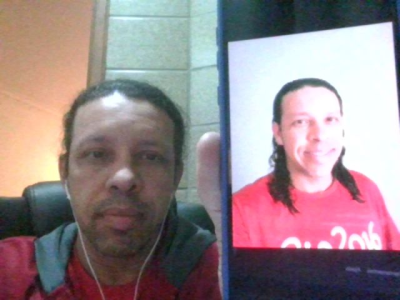

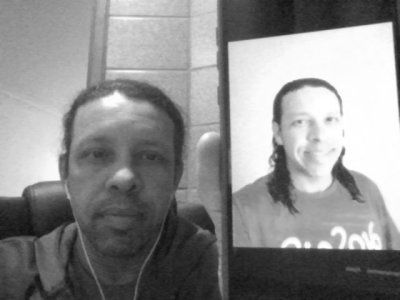

In [31]:
# Start webcan
def take_photo(filename='photo.jpg', quality=0.8):
  js_code = '''
  async function takePhoto(quality) {
    const div = document.createElement('div');
    const capture = document.createElement('button');
    capture.textContent = 'Capture';
    div.appendChild(capture);

    const video = document.createElement('video');
    video.style.display = 'block';
    const stream = await navigator.mediaDevices.getUserMedia({video: true});

    document.body.appendChild(div);
    div.appendChild(video);

    video.srcObject = stream;
    await video.play();

    // Resize the output to fit the video element.
    google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

    // Wait for Capture to be clicked.
    await new Promise((resolve) => capture.onclick = resolve);

    const canvas = document.createElement('canvas');
    canvas.width = video.videoWidth;
    canvas.height = video.videoHeight;
    canvas.getContext('2d').drawImage(video, 0, 0);
    stream.getVideoTracks()[0].stop();
    div.remove();
    return canvas.toDataURL('image/jpeg', quality);
  }
  '''
  display(Javascript(js_code))
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Clique em Capturar para fazer a foto usando a webcan
image_file = take_photo()

# Ler, redimensionar e exibir a imagem
image = cv2.imread(image_file)

# Redimensiona para ter uma largura de 400 pixels
image = imutils.resize(image, width=400)
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))

# Mostra a imagem
cv2_imshow(image)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
cv2_imshow(gray_image)

In [27]:
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel


--2025-08-15 23:43:01--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0.002s  

Last-modified header missing -- time-stamps turned off.
2025-08-15 23:43:01 (12.0 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2025-08-15 23:43:01--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

[INFO] loading model...
[INFO] computing object detections...


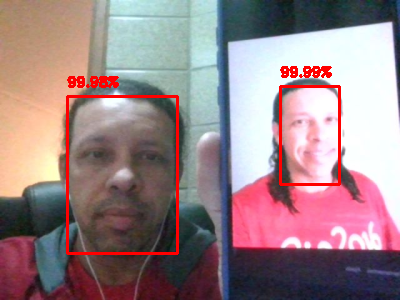

In [32]:
# Carregar o modelo da rede
print("[INFO] loading model...")
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

# Redimensiona para ter uma largura maxima de 400 pixels
image = imutils.resize(image, width=400)
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), (104.0, 177.0, 123.0))

print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

# Faça um loop para detectar e desenhe caixa ao redor dos rostos
for i in range (0, detections.shape[2]):

# extrair a probabilidade associada a previsão
  confidence = detections[0, 0, i, 2]
  if confidence > 0.5:
    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")
    text = "{:.2f}%".format(confidence * 100)
    y = startY - 10 if startY - 10 > 10 else startY + 10
    cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
    cv2.putText(image, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

# Mostra a imagem
cv2_imshow(image)